In [1]:
import sys; sys.path.insert(0, '../..')

import fenics as fa
import matplotlib.pyplot as plt
import mshr
import numpy as np
import pdb
import argparse
import jax
from collections import namedtuple

from src.linear_stokes.linear_stokes_common import (
    plot_solution,
    loss_fn,
    fenics_to_jax,
    SecondOrderTaylorLookup,
    error_on_coords,
    sample_params,
    sample_points,
    loss_divu_fn,
    loss_stress_fn,
    get_p,
    get_u,
    deviatoric_stress
)

from src.linear_stokes.linear_stokes_fenics import (
    solve_fenics,
    is_defined,
    parser
)

In [2]:
args = parser.parse_args("")
args = namedtuple("ArgsTuple", vars(args))(**vars(args))

params = sample_params(jax.random.PRNGKey(args.seed), args)
source_params, bc_params, per_hole_params, num_holes = params
print("params: ", params)

/usr/local/anaconda3/envs/dvvf/lib/python3.6/site-packages/jax/lib/xla_bridge.py:130: UserWarning: No GPU/TPU found, falling back to CPU.
  warnings.warn('No GPU/TPU found, falling back to CPU.')


params:  (DeviceArray([0.4130522 , 0.25975317], dtype=float32), DeviceArray([3.000803], dtype=float32), DeviceArray([[ 0.04156993, -0.0613506 ,  0.47837767,  0.20494777,
               0.44709057],
             [-0.03926784, -0.11530625,  0.10562178,  0.4114218 ,
               0.35706055],
             [-0.04186818,  0.01709074,  0.18381561, -0.53561956,
               0.29799348]], dtype=float32), DeviceArray(1, dtype=int32))


In [3]:
u_p = solve_fenics(params, boundary_points=32, resolution=32)

In [4]:
points = sample_points(jax.random.PRNGKey(args.seed + 1), 1024, params)
points_on_inlet, points_on_walls, points_on_holes, points_in_domain = points

all_points = np.concatenate(points)

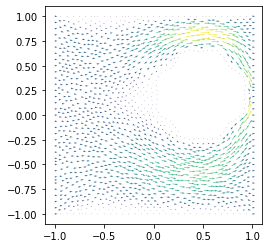

In [5]:
u, p = u_p.split()
fa.plot(u)

In [6]:
x0 = points_in_domain[120]

In [7]:
taylor = SecondOrderTaylorLookup(u_p, all_points, d = 3)

# Loss Function 

29386.877
7.948555


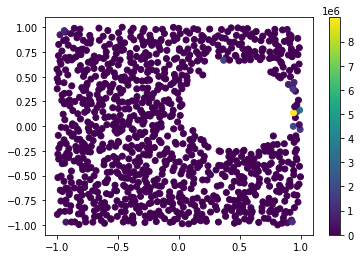

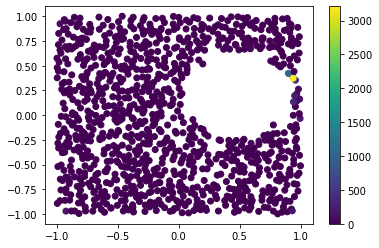

In [8]:
jax_stress_loss = loss_stress_fn(taylor, points_in_domain, params)
jax_divu_loss = loss_divu_fn(taylor, points_in_domain, params)

print(np.mean(jax_stress_loss, axis=0))
print(np.mean(jax_divu_loss, axis=0))

plt.figure()
clrs = plt.scatter(points_in_domain[:,0], points_in_domain[:,1], c = np.array(jax_stress_loss))
plt.colorbar(clrs)
plt.show()

plt.figure()
clrs = plt.scatter(points_in_domain[:,0], points_in_domain[:,1], c = np.array(jax_divu_loss))
plt.colorbar(clrs)
plt.show()

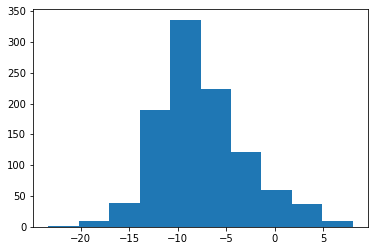

In [9]:
plt.figure()
plt.hist(np.log(jax_divu_loss))
plt.show()

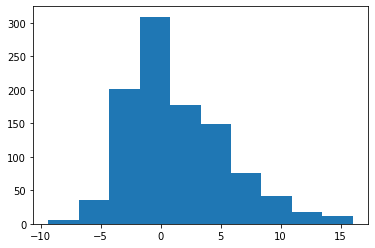

In [10]:
plt.figure()
plt.hist(np.log(jax_stress_loss))
plt.show()

In [11]:
u, p = fa.split(u_p)

In [12]:
div_u_fenics = fa.div(u)

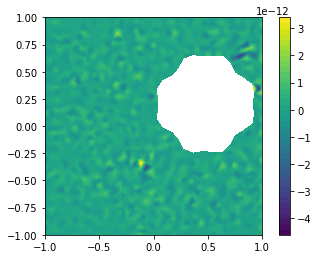

In [13]:
clrs = fa.plot(div_u_fenics)
plt.colorbar(clrs)

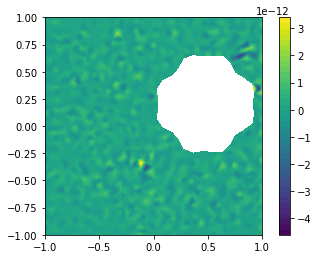

In [14]:
trace_jac_u_fenics = fa.tr(fa.grad(u))
clrs = fa.plot(trace_jac_u_fenics)
plt.colorbar(clrs)

In [15]:
fa.assemble(div_u_fenics*fa.dx)

-7.721498137061578e-15

In [16]:
jac_u = fa.project(fa.grad(u), fa.TensorFunctionSpace(u_p.function_space().mesh(), 'P', 2, (2, 2)))

In [17]:
jac_u([0., 0.]).reshape(2,2)

array([[-6.36583036, -8.80013566],
       [ 6.75375691,  6.38790732]])

In [18]:
jac_u([-0.02, -0.02]).reshape(2,2)

array([[-5.77619924, -9.19114902],
       [ 4.91076238,  5.80499784]])

14.396613835017176

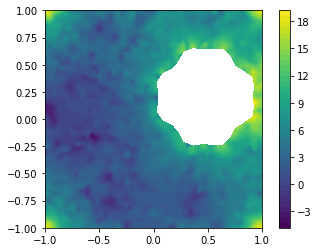

In [19]:
div_gradu_minus_p = fa.div(fa.grad(u) - p * fa.Identity(2))

lognorm = fa.ln(fa.inner(div_gradu_minus_p, div_gradu_minus_p))

clrs = fa.plot(lognorm)
plt.colorbar(clrs)

fa.assemble(lognorm*fa.dx)

In [ ]:
u_p = solve_fenics(params, boundary_points=128, resolution=128)

In [ ]:
points = sample_points(jax.random.PRNGKey(args.seed + 1), 1024, params)
points_on_inlet, points_on_walls, points_on_holes, points_in_domain = points

all_points = np.concatenate(points)

In [ ]:
u, p = u_p.split()
fa.plot(u)

In [ ]:
x0 = points_in_domain[120]

In [ ]:
taylor = SecondOrderTaylorLookup(u_p, all_points, d = 3)

# Loss Function 

In [ ]:
jax_stress_loss = loss_stress_fn(taylor, points_in_domain, params)
jax_divu_loss = loss_divu_fn(taylor, points_in_domain, params)

print(np.mean(jax_stress_loss, axis=0))
print(np.mean(jax_divu_loss, axis=0))

plt.figure()
clrs = plt.scatter(points_in_domain[:,0], points_in_domain[:,1], c = np.array(jax_stress_loss))
plt.colorbar(clrs)
plt.show()

plt.figure()
clrs = plt.scatter(points_in_domain[:,0], points_in_domain[:,1], c = np.array(jax_divu_loss))
plt.colorbar(clrs)
plt.show()

In [ ]:
plt.figure()
plt.hist(np.log(jax_divu_loss))
plt.show()

In [ ]:
plt.figure()
plt.hist(np.log(jax_stress_loss))
plt.show()

In [ ]:
u, p = fa.split(u_p)

In [ ]:
div_u_fenics = fa.div(u)

In [ ]:
clrs = fa.plot(div_u_fenics)
plt.colorbar(clrs)

In [ ]:
trace_jac_u_fenics = fa.tr(fa.grad(u))
clrs = fa.plot(trace_jac_u_fenics)
plt.colorbar(clrs)

In [ ]:
fa.assemble(div_u_fenics*fa.dx)

In [ ]:
jac_u = fa.project(fa.grad(u), fa.TensorFunctionSpace(u_p.function_space().mesh(), 'P', 2, (2, 2)))

In [ ]:
jac_u([0., 0.]).reshape(2,2)

In [ ]:
jac_u([-0.02, -0.02]).reshape(2,2)

In [ ]:
div_gradu_minus_p = fa.div(fa.grad(u) - p * fa.Identity(2))

lognorm = fa.ln(fa.inner(div_gradu_minus_p, div_gradu_minus_p))

clrs = fa.plot(lognorm)
plt.colorbar(clrs)

fa.assemble(lognorm*fa.dx)